In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('/content/MG_data (1).xlsx - Sheet1.csv')
print(df.shape)
df.head(20)

(441, 9)


,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3
5,Cu60Zr20Hf10Ti10,754.0,797.0,1197.0,1.70,14.23,0.13,9.71,0.3
6,Mg70Ni20La10,447.0,475.0,791.0,1.41,13.53,0.15,7.53,0.4
7,Ca55Mg15Zn30,387.0,419.0,696.0,1.24,16.60,0.16,9.02,0.5
8,Ca55Mg18Zn27,389.0,419.0,671.0,1.23,16.73,0.15,9.11,0.5
9,Ca60Mg10Zn30,380.0,400.0,666.0,1.23,17.16,0.16,8.38,0.5


In [4]:
def parse_alloy_composition(alloy):
    parts = re.split('(\d+\.?\d*)', alloy)
    parts = [part for part in parts if part]  # Remove empty strings
    metals = {}
    for i in range(0, len(parts), 2):
        metal = parts[i].strip()
        percentage = float(parts[i+1]) / 100  # Convert to decimal
        metals[metal] = percentage
    return metals

In [5]:
def update_metal_percentages(df, alloy_column):
    for index, row in df.iterrows():
        # Extract metals and their percentages
        alloy_composition = row[alloy_column]
        metal_percentages = re.findall('([A-Za-z]+)([\d.]+)', alloy_composition)

        total_percentage = sum(float(percent) for _, percent in metal_percentages)

        for metal, percentage in metal_percentages:
            percentage_decimal = float(percentage) / total_percentage
            column_name = f'metal_{metal}'

            # Check if the metal column exists, if not, create it
            if column_name not in df.columns:
                df[column_name] = 0.0  # Initialize new metal column with 0.0

            # Update the metal's percentage for the current row
            df.at[index, column_name] = percentage_decimal

In [6]:
update_metal_percentages(df,'Alloy')

In [ ]:
df.shape

(441, 46)

In [ ]:
parse_alloy_composition('Ti50Cu42.5Ni7.5')

{'Ti': 0.5, 'Cu': 0.425, 'Ni': 0.075}

<ipython-input-18-1f35debea5b2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


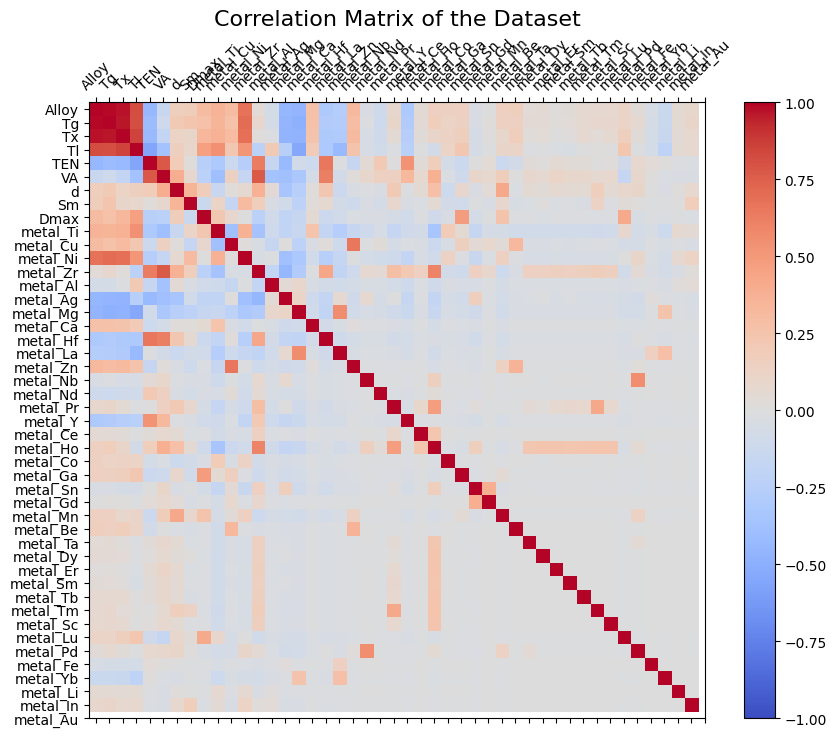

In [ ]:
# prompt: create and plot a correlation matrix of the dataset with matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set labels and title
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45)
ax.set_yticklabels(df.columns)
plt.title('Correlation Matrix of the Dataset', fontsize=16)
plt.show()


In [ ]:
# prompt: do a train test split of 20 percent

from sklearn.model_selection import train_test_split

X = df.drop(['Dmax','Alloy'], axis=1)
y = df['Dmax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (352, 44)
Shape of X_test: (89, 44)
Shape of y_train: (352,)
Shape of y_test: (89,)


In [22]:
# prompt: implement grid search for xgboost regressor

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 1, 2, 3],
    'n_estimators': [100, 150, 200,300]
}

# Initialize the XGBRegressor model
xgb_model = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [27]:
# prompt: run xgboost regression with above train and then test on above test split

import xgboost as xgb

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 6.526241005363548
R2: 0.7685065005570124
